In [1]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import celldom
import matplotlib.pyplot as plt
from celldom.config import experiment_config
from celldom.core import cytometry
from celldom.execute import analysis

In [45]:
#OUTPUT_DIR = '20180911-G3-yl'
OUTPUT_DIR = '20180908-G3-full'
EXP_CONFIG = 'experiment_example_G3'
data_dir = osp.join(celldom.get_data_dir(), 'output', OUTPUT_DIR)
data_dir

'/lab/data/celldom/output/20180908-G3-full'

In [46]:
config = experiment_config.get_exp_config_by_name(EXP_CONFIG)
store = cytometry.get_readonly_datastore(data_dir)

In [47]:
acq_data = store.get('acquisition')

In [48]:
acq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22705 entries, 0 to 0
Data columns (total 15 columns):
acq_apartment             22705 non-null object
acq_cohort                22705 non-null object
acq_color                 22705 non-null object
acq_condition             22705 non-null object
acq_datetime              22705 non-null datetime64[ns]
acq_hours                 22705 non-null object
acq_id                    22705 non-null object
acq_processed_at          22705 non-null datetime64[ns]
acq_pump                  22705 non-null object
acq_street                22705 non-null object
apt_count                 22705 non-null int64
raw_image_path            22705 non-null object
raw_image_shape_height    22705 non-null int64
raw_image_shape_width     22705 non-null int64
rotation                  22705 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(9)
memory usage: 2.8+ MB


In [49]:
apt_data = store.get('apartment')
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135829 entries, 0 to 5
Data columns (total 36 columns):
acq_apartment             135829 non-null object
acq_cohort                135829 non-null object
acq_color                 135829 non-null object
acq_condition             135829 non-null object
acq_datetime              135829 non-null datetime64[ns]
acq_hours                 135829 non-null object
acq_id                    135829 non-null object
acq_processed_at          135829 non-null datetime64[ns]
acq_pump                  135829 non-null object
acq_street                135829 non-null object
apt_id                    135829 non-null int64
apt_image_height          135829 non-null int64
apt_image_width           135829 non-null int64
apt_num                   135829 non-null object
apt_num_digit_scores      135829 non-null object
cell_area_mean            121967 non-null float64
cell_area_p10             121967 non-null float64
cell_area_p50             121967 non-null floa

In [50]:
apt_data['st_num_digit_scores'].iloc[0]

'1.000,1.000'

In [51]:
df = apt_data.copy()
df['key'] = df[config.experimental_condition_fields + ['apt_num', 'st_num']].apply(lambda r: ':'.join(r.values.astype(str)), axis=1)

In [52]:
#key = 'gravity:White:3:Control:05:73'
#key = 'gravity:Green:3:0.3uM:89:09'
key = 'gravity:White:3:Control:01:70'
key = 'gravity:White:3:Control:03:71'
key = 'gravity:Pink:3:0.5uM:27:02'
key = 'gravity:Blue:3:Control:04:04'
key = 'gravity:Blue:3:Control:22:11'
df[df['key'] == key].filter(regex='scores')

,apt_num_digit_scores,st_num_digit_scores
4,"1.000,1.000","1.000,1.000"
3,"1.000,1.000","1.000,1.000"
3,"1.000,1.000","1.000,1.000"
3,"1.000,1.000","1.000,1.000"
3,"1.000,1.000","1.000,1.000"
5,"1.000,1.000","1.000,1.000"
4,"1.000,1.000","1.000,1.000"
4,"1.000,1.000","1.000,1.000"
3,"1.000,1.000","1.000,1.000"


In [53]:
acq_id = df[df['key'] == key]['acq_id'].iloc[-1]
acq_data[acq_data['acq_id'] == acq_id]['raw_image_path'].tolist()

['/lab/data/celldom/dataset/dataset05/_2018.06.17 EXP SUM Control 0.3uM 0.5uM with 5mL gravity/_2018.06.17 Blue 3 Control/_2018.06.17 Blue 3 Control 96 hr/BFF_16X_St_009_Apt_022_201806212249.tif']

In [54]:
dfs = []
for i, r in apt_data.iterrows():
    digits = list(r['apt_num']) + list(r['st_num'])
    scores = [float(v) for v in r['apt_num_digit_scores'].split(',') + r['st_num_digit_scores'].split(',')]
    for i, t in enumerate(['a1', 'a2', 's1', 's2']):
        dfs.append((digits[i], scores[i], t))
dfs = pd.DataFrame(dfs, columns=['digit', 'score', 'type'])
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543316 entries, 0 to 543315
Data columns (total 3 columns):
digit    543316 non-null object
score    543316 non-null float64
type     543316 non-null object
dtypes: float64(1), object(2)
memory usage: 12.4+ MB


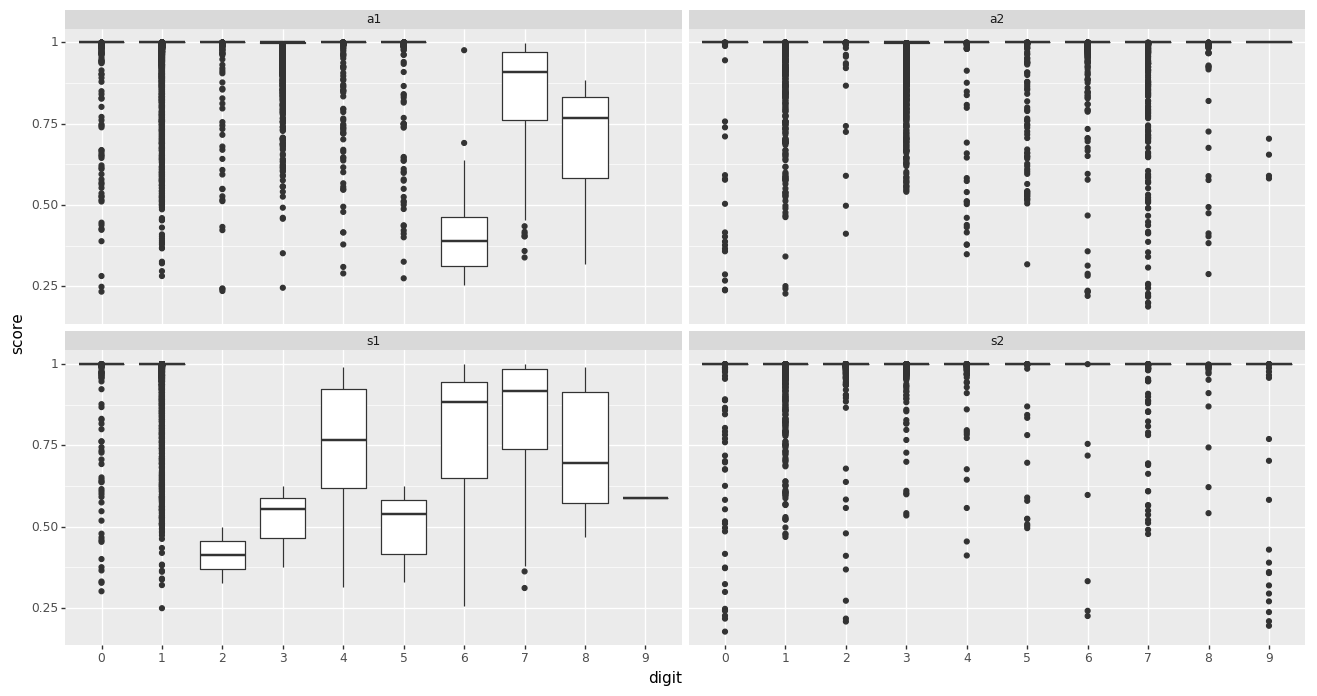

<ggplot: (-9223363283472389807)>

In [27]:
import plotnine as pn

(
    pn.ggplot(dfs, pn.aes(x='digit', y='score')) + 
    pn.geom_boxplot() +
    pn.facet_wrap('~type') +
    pn.theme(figure_size=(16, 8))
)